In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import os
os.getcwd()

'D:\\OneDrive - knu.ac.kr\\학석사\\ML_학회발표'

In [40]:
df = pd.read_excel('mobility_data.xlsx')

In [41]:
df = df[['Date', 'count', 'seoul_parks']]

In [42]:
df = df.iloc[:600, :]

In [43]:
df_date = df.set_index('Date')


In [46]:
df_date = df_date.resample('W-Fri').sum() # 주간 합계산 

In [47]:
df_date

,count,seoul_parks
Date,,
2020-02-21,128,-39
2020-02-28,1860,-108
2020-03-06,4256,-26
2020-03-13,1685,46
2020-03-20,611,82
...,...,...
2021-09-10,12037,283
2021-09-17,12358,322
2021-09-24,13000,635


<Figure size 864x576 with 0 Axes>

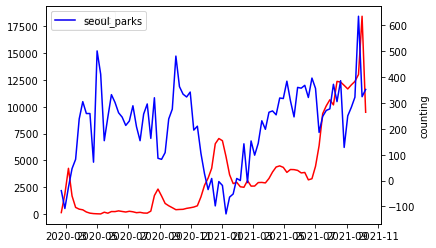

In [58]:
plt.figure(figsize = (12, 8))
fig, ax = plt.subplots()
ax.plot(df_date['count'], color = 'red', label = 'count')
plt.legend()

ax1 = ax.twinx()
ax1.plot(df_date['seoul_parks'], color = 'blue', label = 'seoul_parks')
plt.legend()
plt.xlabel('Date')
plt.ylabel('counting')

plt.show()

In [59]:
df

,Date,count,seoul_parks
0,2020-02-15,0,3
1,2020-02-16,2,-31
2,2020-02-17,0,-17
3,2020-02-18,2,-5
4,2020-02-19,34,14
...,...,...,...
595,2021-10-02,2220,56
596,2021-10-03,2057,91
597,2021-10-04,1650,106
598,2021-10-05,1555,49


In [60]:
import statsmodels.api as sm

cc = sm.tsa.stattools.ccf(df['count'], df['seoul_parks'] ,adjusted = False)

In [64]:
cc[:50]

array([0.10030871, 0.0939118 , 0.12529297, 0.14307365, 0.12247414,
       0.11551936, 0.10427375, 0.10281224, 0.10638524, 0.13919471,
       0.1366385 , 0.10715366, 0.08985982, 0.08673775, 0.09240303,
       0.08509537, 0.10967958, 0.09808932, 0.06515287, 0.05424545,
       0.05773072, 0.07611712, 0.08129928, 0.10652379, 0.10356294,
       0.07871955, 0.07142425, 0.07390504, 0.08780634, 0.08912403,
       0.12465669, 0.12232959, 0.10092239, 0.09052346, 0.0882385 ,
       0.09777891, 0.11212528, 0.14346122, 0.14668462, 0.13240294,
       0.12845531, 0.13158563, 0.14814895, 0.15922506, 0.19431787,
       0.20598192, 0.18827257, 0.18250833, 0.1765297 , 0.1916432 ])

In [67]:
result = []

for i in range(1, 13):
    c1 = cc[50* (i-1) : 50 * i]
    result.append(c1)
    
    

In [69]:
result = pd.DataFrame(result);result

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.100309,0.093912,0.125293,0.143074,0.122474,0.115519,0.104274,0.102812,0.106385,0.139195,...,0.128455,0.131586,0.148149,0.159225,0.194318,0.205982,0.188273,0.182508,0.176530,0.191643
1,0.197314,0.223131,0.219120,0.204698,0.190302,0.183081,0.200700,0.203913,0.222202,0.219925,...,0.170832,0.187546,0.191895,0.212471,0.222377,0.198688,0.178882,0.170101,0.189271,0.179446
2,0.191558,0.193586,0.169202,0.150387,0.133596,0.149017,0.150824,0.161815,0.169388,0.140983,...,0.055398,0.040773,0.056514,0.066036,0.044853,0.038335,0.034593,0.042113,0.030860,0.040861
3,0.047647,0.021554,0.011040,0.012045,0.019079,-0.006520,0.006364,0.007669,-0.012041,-0.020546,...,-0.179699,-0.170976,-0.168966,-0.182533,-0.182865,-0.187386,-0.187262,-0.195560,-0.181515,-0.179470
4,-0.187765,-0.190667,-0.201420,-0.198994,-0.205438,-0.197113,-0.199387,-0.214678,-0.228178,-0.225193,...,-0.278089,-0.271844,-0.281055,-0.286915,-0.284802,-0.276594,-0.274492,-0.255339,-0.256364,-0.266136
5,-0.278480,-0.281531,-0.275102,-0.271005,-0.247833,-0.249599,-0.259800,-0.264848,-0.264812,-0.261169,...,-0.107820,-0.111921,-0.106172,-0.104974,-0.099968,-0.095612,-0.079504,-0.076239,-0.075708,-0.081761
6,-0.084537,-0.077228,-0.071503,-0.058029,-0.052816,-0.055587,-0.054823,-0.051551,-0.038568,-0.028953,...,0.102151,0.100673,0.098894,0.097831,0.097725,0.109132,0.102470,0.082690,0.077133,0.080306
7,0.085425,0.090806,0.097940,0.096492,0.078956,0.071112,0.068041,0.075665,0.089832,0.104637,...,-0.024346,-0.029981,-0.033157,-0.027417,-0.018484,-0.011102,-0.008434,-0.008678,-0.015279,-0.008503
8,0.007327,0.020410,0.019916,0.022273,0.025356,0.024488,0.032987,0.038587,0.053702,0.051694,...,0.055930,0.069315,0.069741,0.074036,0.076764,0.072983,0.062424,0.062479,0.072140,0.072356
9,0.081807,0.089179,0.078157,0.063699,0.069527,0.078894,0.073777,0.075323,0.073893,0.069583,...,0.053070,0.048459,0.061861,0.051382,0.030646,0.014341,0.014621,0.014076,0.000777,0.013767
